# Part 1

In [235]:
import pandas as pd
import numpy as np
import matplotlib 
from scipy import stats
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#get header names
with open('field_names.txt', 'r') as f:
    header = f.read().split('\n')


# get data and attach header names
cancer = pd.read_csv("breast-cancer.csv",header=None)
cancer.columns = header
cancer.head() 

# Check the magnitude of missing data
#cancer.isnull().any(axis =0)
# Lucky! no missing data

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Comment on any steps you might take to evaluate or transform the dataset.

- examine missing data
- Look for outliers
- Determine what kind of scaling is appropriate for each variable
- Explore relationships between the variables.
- Possibly look at dimensionality reduction.

## Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [136]:
# Get the mean and median (50% percentile) across the benign and maglignant groups. 
cancer.groupby('diagnosis')[['smoothness_mean','compactness_mean' ]].describe()

smoothness_mean  compactness_mean
diagnosis                                         
B         count       357.000000        357.000000
          mean          2.000321          0.021438
          std           0.771169          0.016352
          min           0.757000          0.002252
          25%           1.445000          0.011320
          50%           1.851000          0.016310
          75%           2.388000          0.025890
          max           5.118000          0.106400
M         count       212.000000        212.000000
          mean          4.323929          0.032281
          std           2.568546          0.018387
          min           1.334000          0.008422
          25%           2.715500          0.019662
          50%           3.679500          0.028590
          75%           5.206250          0.038910
          max          21.980000          0.135400

Do a t-test hypothesis test of two independent means with unequal variances to check if the mean differences are significant across the two groups. Here I am assuming that the groups are sampled from a normal distribution which is an assumption that should be checked.

In [141]:
ben = cancer[cancer['diagnosis'] == 'B']['smoothness_mean']
mag = cancer[cancer['diagnosis'] == 'M']['smoothness_mean']
print "smoothness_mean pvalue is ", stats.ttest_ind(ben,mag,equal_var=False).pvalue

ben = cancer[cancer['diagnosis'] == 'B']['compactness_mean']
mag = cancer[cancer['diagnosis'] == 'M']['compactness_mean']
print "compactness_mean pvalue is ", stats.ttest_ind(ben,mag,equal_var=False).pvalue

smoothness_mean pvalue is  6.86855288109e-29
compactness_mean pvalue is  6.34180707727e-12


The pvalue for both the smoothness mean and the compactness mean are both practically zero, smaller than a threshold of 1%, so I'm likely to believe that the differences are signicant. 

## Create a bootstrap function

I created a simple random bootstrap function.

In [249]:
#bootstrap takes a dataframe and returns a sampled dataframe of sample_size

def bootstrap(data, sample_size = 10):
    # seed for generator to make predictable sample sizes
    # np.random.seed(10)
    
    array_size = len(data)
    
    #get a random subset of the index array, sampling with replacement. 
    ran = np.random.choice(array_size,sample_size)
    
    return data.ix[ran]

bootstrap(cancer,20)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
171,87163,M,13.430,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.034380,...,17.98,29.87,116.60,993.6,0.14010,0.15460,0.26440,0.11600,0.2884,0.07371
480,912193,B,12.160,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.015270,...,13.34,27.87,88.83,547.4,0.12080,0.22790,0.16200,0.05690,0.2406,0.07729
535,919555,M,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.132200,...,24.30,25.48,160.20,1809.0,0.12680,0.31350,0.44330,0.21480,0.3077,0.07569
298,892214,B,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.013740,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
506,91544001,B,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.021660,...,13.16,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839
397,90401602,B,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.040830,...,13.74,21.06,90.72,591.0,0.09534,0.18120,0.19010,0.08296,0.1988,0.07053
23,851509,M,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,...,29.17,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
297,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915
500,914862,B,15.040,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.061420,...,16.76,20.43,109.70,856.9,0.11350,0.21760,0.18560,0.10180,0.2177,0.08549
134,867739,M,18.450,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.068470,...,22.52,31.39,145.60,1590.0,0.14650,0.22750,0.39650,0.13790,0.3109,0.07610


## Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.


In [181]:
# Take the correlation of each variable with the label column
# first center the numerical columns, make zero mean and unit variance
# Make the diagnosis columns number by dummy coding.  1 represents Maglignant, 0 represents benign
# Then take the correlation of the each column with the label columns

data = cancer[cancer.columns[2:]]
scaled = data.apply(lambda x : (x - x.mean())/x.std())
scaled['label'] = cancer['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
scaled.corr()['label'].sort_values(ascending=False)

label                         1.000000
fractal_dimension_mean        0.793566
concave_points_sd_error       0.782914
perimeter_sd_error            0.776614
concavity_worst               0.776454
radius_worst                  0.742636
concave_points_worst          0.733825
radius_mean                   0.730029
texture_mean                  0.708984
perimeter_mean                0.696360
symmetry_worst                0.659610
texture_worst                 0.596534
symmetry_sd_error             0.590998
area_sd_error                 0.567134
smoothness_mean               0.556141
smoothness_sd_error           0.548236
concave_points_mean           0.456903
symmetry_mean                 0.421465
fractal_dimension_sd_error    0.416294
radius_sd_error               0.415185
compactness_worst             0.408042
texture_sd_error              0.358560
perimeter_worst               0.330499
fractal_dimension_worst       0.323872
compactness_mean              0.292999
compactness_sd_error     

## Most Predictive columns

- Looking at the top most columns correlated with the labels columns, we expect 'fractal_dimension_mean','concave_points_sd_error', 'perimeter_sd_error' to be highly predictive of tumor type.
- We can confirm by looking at a plot of the scaled columns across the two label groups


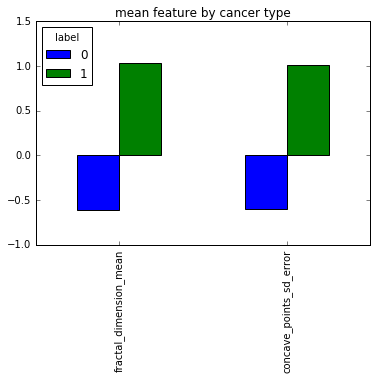

In [252]:
grouped = scaled.groupby('label')
grouped[['fractal_dimension_mean','concave_points_sd_error']].mean().T.plot.bar(title="mean feature by cancer type")

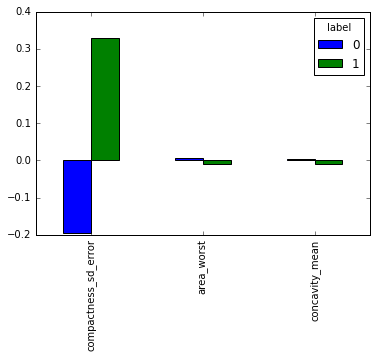

In [189]:
# Compare with group means with columns weakly correlated with the label 
grouped[['compactness_sd_error','area_worst', 'concavity_mean']].mean().T.plot.bar()

In [258]:
grouped['fractal_dimension_mean'].describe()

label       
0      count    357.000000
       mean      -0.610991
       std        0.544593
       min       -1.743529
       25%       -0.967046
       50%       -0.613035
       75%       -0.260393
       max        0.918783
1      count    212.000000
       mean       1.028886
       std        0.704490
       min       -1.302498
       25%        0.580289
       50%        1.025276
       75%        1.461515
       max        2.683516
dtype: float64

label
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: fractal_dimension_mean, dtype: object

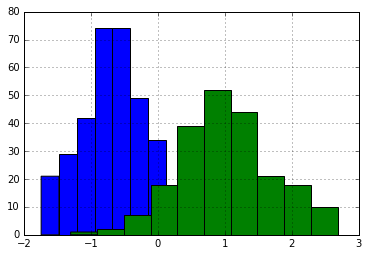

In [260]:
grouped['fractal_dimension_mean'].hist(title="Histogram of the fractal dimension mean")

## Predictive columns
- Use the most correlated columns with  the label  column as a proxy of how predictive the columns are.
- We can see that the more correlated a column is with the label column, the bigger the difference in the mean  values across the tumor groups
- For example, on a highly correlated variable like the scaled fractral dimension mean, you can see on the histogram of the fractral dimention mean is nicely separated between the tumor groups. The mean scaled fractal dimension of benign tumors is -0.6 compared with 1 for the cancerous group. This might indicate maglignant tumors exhibit more complex structure.

## Modeling
- Try a random forest model using all the columns.
- Use standard scaling on the numerical columns
- Predicting for maglignant tumors


recall:  0.915503875969
roc:  0.98155964209
f1:  0.930253265988
precision:  0.946583318762
accuracy:  0.949195844556


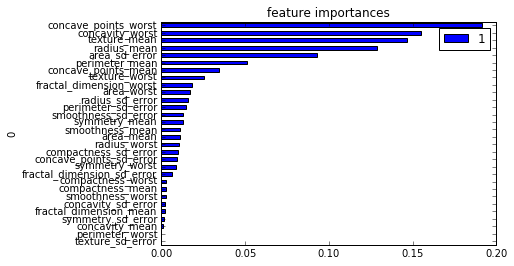

In [199]:
# Random forest model

X = cancer[cancer.columns[2:]]
X = StandardScaler().fit_transform(X)
y =  cancer['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)


clf = RandomForestClassifier(n_estimators=5, random_state=10)
kfolds = 5

print "recall: ", cross_val_score(clf, X, y, cv = kfolds, scoring='recall').mean()
print "roc: ", cross_val_score(clf, X, y, cv = kfolds, scoring='roc_auc').mean()
print "f1: ", cross_val_score(clf, X, y, cv = kfolds, scoring='f1').mean()
print "precision: ", cross_val_score(clf, X, y, cv = kfolds, scoring='precision').mean()
print "accuracy: ", cross_val_score(clf, X, y, cv = kfolds).mean()


clf = clf.fit(X, y)

#get the feature importances
features = zip(cancer.columns[2:],clf.feature_importances_)
features.sort(key = lambda x : x[1])
features = pd.DataFrame(features).set_index(0)
plt.figure()
features.plot.barh(title='feature importances')
plt.savefig("featureimportances.png")

##  Random Forest
- We can control for overfitting by preferring less complex random forest models. We can reduce complexity of the random forest model, by increasing the number of trees in the forest, and using more complex trees e.g increasing tree depth.

### Evaluation
- I used 5 fold cross validation strategy to evaluate the model
- I care more about false negatives i.e labeling malignant tumors as benign. The recall is sensitive to the false negatives and it's slightly worse than the precision.
- Even so, the numbers are overall good as the accuracy and the area under the roc curve are above 90%. 
- With such good numbers, I worry about overfitting. 

### Feature importances
- In random forests features importances function, I find concave_points_worst, concavity_worst, and texture_mean are highly predictive of tumor kinds.
- Feature importances are measured by evaluating the performance of the random forest when a particular column in question is perturbed while keeping every other column the same. The reasoning being that if a feature is important, then scrambling its entries should significantly degrade the performance of the model. 


recall:  0.96234772979
roc:  0.99423660828
f1:  0.962276068228
precision:  0.963300110742
accuracy:  0.971896883417


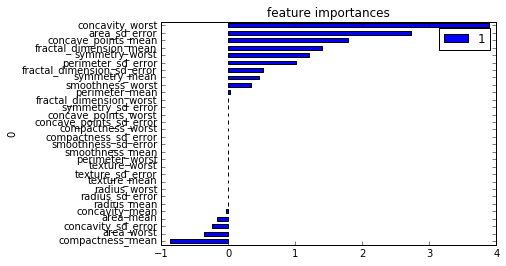

In [257]:
# Logistic Regression model
clf = LogisticRegression(penalty='l1', random_state=10,class_weight='balanced')

kfolds = 5

print "recall: ", cross_val_score(clf, X, y, cv = kfolds, scoring='recall').mean()
print "roc: ", cross_val_score(clf, X, y, cv = kfolds, scoring='roc_auc').mean()
print "f1: ", cross_val_score(clf, X, y, cv = kfolds, scoring='f1').mean()
print "precision: ", cross_val_score(clf, X, y, cv = kfolds, scoring='precision').mean()
print "accuracy: ", cross_val_score(clf, X, y, cv = kfolds).mean()


#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = clf.fit(X, y)

#get the feature importances
features = zip(cancer.columns[2:],clf.coef_[0])
features.sort(key = lambda x : x[1])
#print features
features = pd.DataFrame(features).set_index(0)
plt.figure()
features.plot.barh(title='feature importances')
plt.savefig("featureimportances.png")


## Logistic Regression
- We can control overfitting by using regularization. The default is L2 which doesn't force coefficients to zero, but L1 will force the noisy features to be zero. The complexity parameter C also controls the strictness of the regularization

### Evaluation
- Numbers are better overall than the Random forest model, with recall scores of 96%.  

### Predictive features
- I find concave_points_worst, area_sd_error, and concave_points_mean to be the most predictive of tumor kinds.
- The coefficients of the logistic regression model with the highest magnitude as the most influentual.  Since I used l1 penalty for regularization, the model forces the noisy features to be zeroed out.

## Decision Tree Model

recall:  0.938870431894
roc:  0.937216906088
f1:  0.917756038419
precision:  0.899817805383
accuracy:  0.936775682955


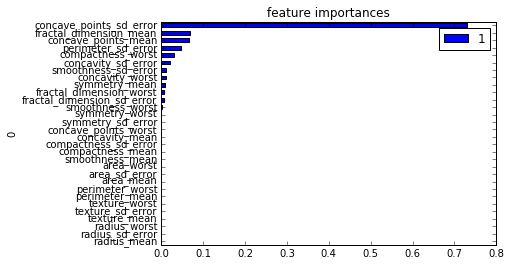

In [231]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=10)

kfolds = 5

print "recall: ", cross_val_score(clf, X, y, cv = kfolds, scoring='recall').mean()
print "roc: ", cross_val_score(clf, X, y, cv = kfolds, scoring='roc_auc').mean()
print "f1: ", cross_val_score(clf, X, y, cv = kfolds, scoring='f1').mean()
print "precision: ", cross_val_score(clf, X, y, cv = kfolds, scoring='precision').mean()
print "accuracy: ", cross_val_score(clf, X, y, cv = kfolds).mean()


#get the feature importances
clf = clf.fit(X, y)
features = zip(cancer.columns[2:],clf.feature_importances_)
features.sort(key = lambda x : x[1])
features = pd.DataFrame(features).set_index(0)
plt.figure()
features.plot.barh(title='feature importances')
plt.savefig("featureimportances.png")

## Decision Trees
- We can control overfitting by regulating the size of the tree.  The larger the depth, the more complex the tree is. We can also control mininum leaf size. The smaller the leaf size, the more complex the tree will be. 

### Evaluation
- Numbers overall are worse compared to the RF and LR model. However the recall was better than the precision. 

### Predictive features
- I find concavity_points_sd_error, fractal_dimension_mean, concave_points_mean to be the most influential. This was determined using the feature_importance method. 


## Explanation


### To Technical Audiences:
Although the models performed very well, with over 90% accuracy, I'm worried about overfitting especially since we  have small data.  The country performs a million breast cancer biopsies per year. Doing prediction tasks for million biopsies based on a training set of about 500 rows wouldn't scale well.  I can try to do more model tuning to make the most robust model possible while using the smallest feature set.  Since Logistic Regressions performed the best here, I would do more to play with the regularization see how much we can further simply the model. Dimensionality reduction is another option here to reduce the feature space.


### To Non-Technical Audiences:
I built 3 models to predict the tumor maglignancy based on various numerical measures. The best model performs with a 97% accuracy. The best model (logistic regression) works by calculating the odds of a tumor being cancerous. While this model is very promising, we are limited by the small size of the training set.  However I find that the concave points, area, concavity of tumors contributed the most to the likelihood of a tumor being not benign. For example, for every unit increase in the concave points, keeping everything else constant, there's six-fold increase in the odds of a tumor being cancerous.  

# Part 2

In [263]:
import pandas as pd

jobs = pd.read_csv("9e1a450ef152604e6830ce70f4fc1be8/part-2-data.train.csv")

print jobs['ContractType'].value_counts()
jobs['SalaryNormalized'].describe()

full_time    2978
part_time     578
Name: ContractType, dtype: int64


count     10000.000000
mean      31522.615600
std       16153.358741
min        5184.000000
25%       20648.500000
50%       27500.000000
75%       37500.000000
max      172800.000000
Name: SalaryNormalized, dtype: float64

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

## Code 
- All libraries should be imported at the the head of the file. The libraries shouldn't be imported twice.
- incorrect method of importing the linear regression method.  Linear regression is in the linear models module of sklearn
- Ambigious name of variables x1, x2. The names aren't descriptive enough. 
- Confusion on whether they want to predict on x1 or x2. They switch the order in the scores line.
- Imported the train/test model but never used it.

## Methodology

- I am assuming that the student wanted to do linear regression in which case they wanted to predict SalaryNormalized.  Or maybe not?
- Why is ContractType chosen as the sole feature? 
- ContractType is 70% missing. The nulls haven't been explicitly coded for. 
- There's also question about the cv method to be used here. The train_test split method is imported as well as the cross_val method. They use a cv parameter of 1 which is equivalent to a single train/test split.
- There's confusion on the usage of the cross_val_score method. 

## Conceptual Understanding
- Look over the distinction between regression and classification type problems. 
- Look over missing data problem issues. Focus on simple data without missing data to reinforce the basic modelling steps. 
- Revisit CV methods. There seems to be some confusion about that. 

 


In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

## Code Style
- I have no issues

## Methodology
- ContractType is 70% missing. The nulls haven't been explicitly coded for. 
- sklearn will complain about sizes of X and y if missing data isn't resolved.
- Why was ContractType used as the only feature?


## Conceptual Understanding
- Go over missing data issues and discuss various strategies to deal with it.
- How to get construct more features for the linear regression model.

The main problem would be to address is the missing data and designing more features. And maybe after those concepts are out of the way, I might go over the issues below.

- feature scaling/transformation of salaryNormalized to deal with the fact that it spans 3 orders of magnitude. Possible issues with outliers.  
- Decision Trees as an alternate method for regression. 
- The usage of the 'mean_absolute error' as a comparison metric as opposed to the 'mean-squared-error'